In [41]:
import math
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [42]:
# this function generates given no of random numbers from [0,1]
# Xo is the seed
# full period if m is a power of 2, c is odd and a is 4*n + 1
def Uniform_Distribution(Xo, m, a, c,N):
    arr1 = []
    arr = []
    arr1.append(Xo%m)
    for i in range(1, N):
        arr1.append((arr1[i - 1] * a + c) % m)
    for i in range(0,N):
        arr.append(arr1[i]/m)
    return arr

Im = 1.9835514858163157, L = 1.9680162496788438 and U = 1.9990867219537876 for M = 100


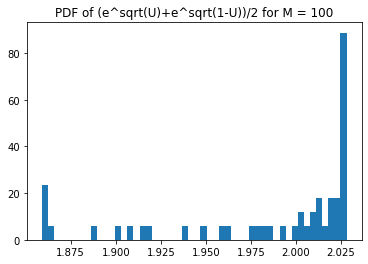

Im = 1.9970388257694407, L = 1.993776847093539 and U = 2.0003008044453425 for M = 1000


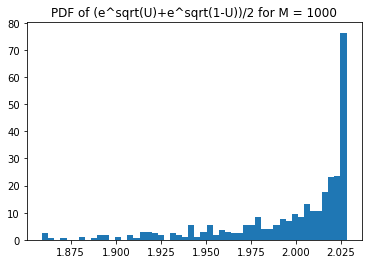

Im = 1.9993787032361658, L = 1.998451217156572 and U = 2.0003061893157597 for M = 10000


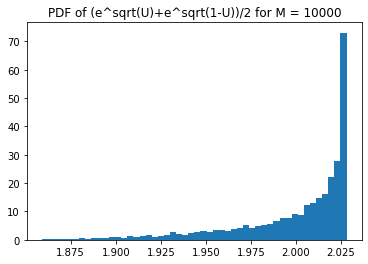

Im = 1.9997835287779493, L = 1.9994935248575483 and U = 2.0000735326983503 for M = 100000


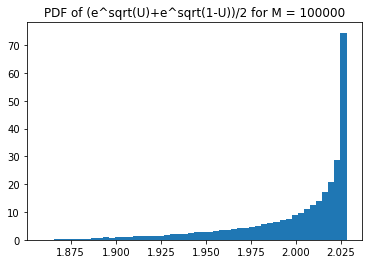

In [43]:
M = [10**2, 10**3, 10**4, 10**5]
for j in range(4):
    s = 0
    N = int(M[j]/2)
    U = Uniform_Distribution(2,2**40, 97, 23, N)
    Y = []

# calculating Im_hat
    for i in range(N):
        Yi = (np.exp(np.sqrt(U[i])) + np.exp(np.sqrt(1-U[i])))/2
        Y.append(Yi)
        s = s + Yi
    μ = s/N

#   calculating Sn
    s = 0
    for i in range(N):
        s = s + (Y[i]-μ)**2
    Sn = np.sqrt(s/(N-1))

#     left end of the 95% confidence interval
    L = μ - 1.96*(Sn/np.sqrt(N))
    
#     right end of the 95% confidence interval
    U = μ + 1.96*(Sn/np.sqrt(N))
    
    print(f"Im = {μ}, L = {L} and U = {U} for M = {M[j]}")
    
#     making histogram
    plt.figure()
    plt.title(f'PDF of (e^sqrt(U)+e^sqrt(1-U))/2 for M = {M[j]}')
    plt.hist(Y, 50, density =True)
    plt.show()